In [5]:
!pip install pandas


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd

In [7]:
data = pd.read_csv('tweets.csv')
pd.set_option('display.max_colwidth',200)
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [ ]:
# label 0 is a positive review and 1 is negative

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [9]:
data = data.drop('id',axis=1)
data.head()

,label,tweet
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [10]:
data['label'].value_counts(normalize=True)

label
0    0.744192
1    0.255808
Name: proportion, dtype: float64

In [11]:
# data is imbalanced but only sightly. For now no processing will be done to make the class completely balanced

# Data Cleaning

In [13]:
import re

In [32]:
!pip install contractions
import contractions


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
#!pip install nltk
import nltk
#nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nagar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [50]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [55]:
def tweet_cleaner_without_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)    
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)    
    new_text = new_text.lower().strip()
    
    cleaned_text = ''
    for token in new_text.split():
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '
    
    return cleaned_text

In [56]:
cleaned_tweets = []  # list of cleaned tweets
for twt in data['tweet']:
    cleaned_tweets.append(tweet_cleaner_without_stopwords(twt))

In [57]:
cleaned_tweets[:5]

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone ',
 'finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias ',
 'we love this would you go talk makememories unplug relax iphone smartphone wifi connect ',
 'i am wired i know i am george i wa made that way iphone cute daventry home ',
 'what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support ']

In [58]:
data['tweet'][1500]

'#Apple Bunch if Crooks Refused to repair/replace my beats wireless. Problem rubber on mic coming off microphones stopped working. Said warranty was void because ear piece looked chewed. Bullshit. I don’t have any animals and I would chew on anything I put in my ear. pic.twitter.com/GfgvquEpuC'

In [59]:
cleaned_tweets[1500]

'apple bunch if crook refused to repair replace my beat wireless problem rubber on mic coming off microphone stopped working said warranty wa void because ear piece looked chewed bullshit i do not have any animal and i would chew on anything i put in my ear pic twitter com gfgvquepuc '

In [60]:
data['cleaned_tweets_w/o_SW'] = cleaned_tweets
data.head()

,label,tweet,cleaned_tweets_w/o_SW
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias
2,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect
3,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home
4,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support


# After applying stop words

In [114]:
from nltk.corpus import stopwords

In [120]:
nltk_stopwords = set(stopwords.words('english'))
print(nltk_stopwords)

{"wouldn't", 'doesn', 'at', "it's", 'are', 'weren', 'having', 'our', 'was', 'of', "couldn't", 'hers', 'didn', 'haven', 'themselves', 'below', 'just', 'now', 'nor', 'in', 'being', 'its', 'does', 'after', 'aren', "shouldn't", 'theirs', 'himself', 'ain', "mustn't", 'll', 'had', 'they', 'do', 'because', 'she', 'the', 'his', 'ma', 'an', 'where', 't', "wasn't", 'same', 'than', 'don', 'again', "isn't", "don't", 'should', 'have', 'into', 'for', "didn't", 'no', 'm', 'y', 'is', 'off', 'or', 'few', 'him', 'won', 'by', 'before', "doesn't", 'more', 'hasn', 'about', "that'll", 'not', 'be', 'all', 'when', "weren't", 'yours', 'can', 'how', 'yourself', 'who', 'but', 'this', 'has', 'mustn', "you've", "you'll", 'whom', "mightn't", 'a', 'were', 'doing', 'under', 'some', "you're", 'to', 'any', "won't", 'me', 'once', 'above', 'i', 'herself', "should've", 'myself', 'will', 'wouldn', 'couldn', 'from', 'mightn', "you'd", "aren't", 's', 'yourselves', 'ourselves', 'there', 'shouldn', 'only', 'he', 'those', 'isn'

In [121]:
len(nltk_stopwords)

179

In [126]:
#!pip install scikit-learn
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords = set(ENGLISH_STOP_WORDS)
print(sklearn_stopwords)

{'alone', 'cannot', 'rather', 'at', 'bottom', 'nine', 'our', 'of', 'was', 'us', 'besides', 'hers', 'wherever', 'formerly', 'name', 'its', 'another', 'after', 'sometime', 'might', 'co', 'hereafter', 'yet', 'well', 'do', 'get', 'thick', 'whereafter', 'amoungst', 'she', 'his', 'anyway', 'move', 'therefore', 'thence', 'where', 'nevertheless', 'same', 'should', 'wherein', 'have', 'except', 'throughout', 'for', 'nobody', 'anything', 'thereupon', 'afterwards', 'him', 'former', 'something', 'more', 'about', 'not', 'be', 'cant', 'yours', 'whose', 'hereby', 'bill', 'every', 'two', 'via', 'yourself', 'upon', 'four', 'who', 'someone', 'has', 'already', 'full', 'whom', 'hundred', 'everywhere', 'hereupon', 'made', 'system', 'under', 'whence', 'somehow', 'to', 'above', 'i', 'herself', 'anyhow', 'myself', 'will', 'seem', 'onto', 'since', 'around', 'find', 'nothing', 'seeming', 'together', 'behind', 'fifty', 'without', 'yourselves', 'three', 'there', 'eight', 'thin', 'other', 'itself', 'enough', 'eg', 

In [127]:
len(sklearn_stopwords)

318

In [132]:
combined_stopwords = nltk_stopwords.union(sklearn_stopwords)
print(combined_stopwords)

{'alone', "wouldn't", 'cannot', 'at', 'rather', 'bottom', 'having', 'nine', 'our', 'was', 'of', 'us', 'besides', 'hers', 'didn', 'wherever', 'haven', 'formerly', 'name', 'its', 'another', 'does', 'after', 'aren', "shouldn't", 'sometime', 'might', 'co', 'hereafter', 'yet', 'well', 'do', 'get', 'thick', 'whereafter', 'amoungst', 'she', 'his', 'anyway', 'move', 'therefore', 'thence', 'where', 'nevertheless', "wasn't", 'same', 'don', "isn't", "don't", 'should', 'wherein', 'have', 'except', 'throughout', 'for', 'nobody', "didn't", 'anything', 'thereupon', 'm', 'y', 'afterwards', 'him', 'former', "doesn't", 'something', 'more', 'about', "that'll", 'not', 'be', 'cant', 'yours', 'whose', 'hereby', 'bill', 'every', 'two', 'yourself', 'who', 'via', 'upon', 'four', 'someone', 'has', 'already', "mightn't", "you'll", 'whom', 'full', 'hundred', 'everywhere', 'hereupon', 'made', 'under', 'system', 'whence', 'somehow', "you're", 'to', "won't", 'above', 'i', 'herself', 'anyhow', "should've", 'myself', 

In [133]:
len(combined_stopwords)

378

In [135]:
def tweet_cleaner_with_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)    
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)    
    new_text = new_text.lower().strip()
    
    new_text = [token for token in new_text.split() if token not in combined_stopwords]
    new_text = [token for token in new_text if len(token)>2]
    
    cleaned_text = ''
    for token in new_text:
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '
    
    return cleaned_text

In [136]:
cleaned_tweets = list(data['tweet'].apply(tweet_cleaner_with_stopwords))
print(cleaned_tweets[:10])

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone ', 'finally transparant silicon case thanks uncle yay sony xperia sonyexperias ', 'love talk makememories unplug relax iphone smartphone wifi connect ', 'wired know george way iphone cute daventry home ', 'amazing service apple talk question unless pay stupid support ', 'iphone software update fucked phone big time stupid iphones ', 'happy instapic instadaily sony xperia xperiaz ', 'new type charger cable bay amazon etsy new year rob cross toby young evemun mcmafia taylor spectre newyear starting recipe technology samsunggalaxys iphonex pic twitter com pjiwq wtc ', 'bout shopping listening music iphone justme music likeforlike followforfollow ', 'photo fun selfie pool water sony camera picoftheday sun instagood boy cute outdoor ']


In [137]:
data.columns

Index(['label', 'tweet', 'cleaned_tweets_w/o_SW'], dtype='object')

In [139]:
data['cleaned_tweets_with_SW'] = cleaned_tweets
data.head()

,label,tweet,cleaned_tweets_w/o_SW,cleaned_tweets_with_SW
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect,love talk makememories unplug relax iphone smartphone wifi connect
3,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home,wired know george way iphone cute daventry home
4,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support,amazing service apple talk question unless pay stupid support


# Data Visualization

In [63]:
all_words = []
for t in data['tweet']:
    all_words.extend(t.split())
print(all_words[:50])

['#fingerprint', '#Pregnancy', 'Test', 'https://goo.gl/h1MfQV', '#android', '#apps', '#beautiful', '#cute', '#health', '#igers', '#iphoneonly', '#iphonesia', '#iphone', 'Finally', 'a', 'transparant', 'silicon', 'case', '^^', 'Thanks', 'to', 'my', 'uncle', ':)', '#yay', '#Sony', '#Xperia', '#S', '#sonyexperias…', 'http://instagram.com/p/YGEt5JC6JM/', 'We', 'love', 'this!', 'Would', 'you', 'go?', '#talk', '#makememories', '#unplug', '#relax', '#iphone', '#smartphone', '#wifi', '#connect...', 'http://fb.me/6N3LsUpCu', "I'm", 'wired', 'I', 'know', "I'm"]


In [66]:
len(set(all_words))

34348

In [68]:
#!pip install matplotlib
import matplotlib.pyplot as plt

  Using cached matplotlib-3.7.1-cp39-cp39-win_amd64.whl (7.6 MB)
  Using cached kiwisolver-1.4.4-cp39-cp39-win_amd64.whl (55 kB)
  Using cached importlib_resources-5.12.0-py3-none-any.whl (36 kB)
  Using cached contourpy-1.0.7-cp39-cp39-win_amd64.whl (160 kB)
  Using cached Pillow-9.5.0-cp39-cp39-win_amd64.whl (2.5 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.39.3-py3-none-any.whl (1.0 MB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)



[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


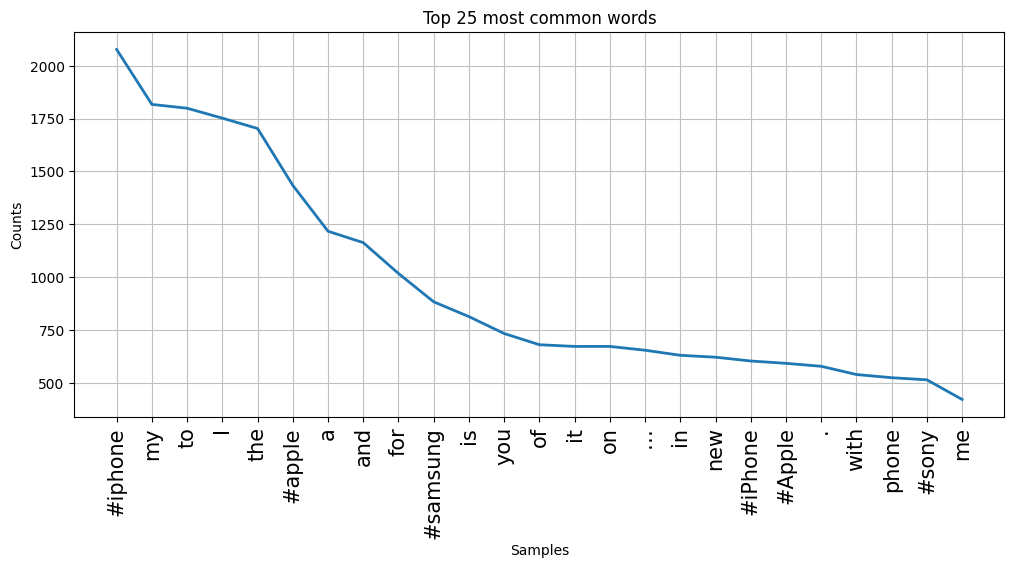

In [88]:
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)


freq_dist.plot(25, cumulative=False)
plt.show()

In [90]:
#plot for Cleaned Tweets

In [92]:
all_words = []
for t in data['cleaned_tweets_w/o_SW']:
    all_words.extend(t.split())

print(all_words[:50])
len(set(all_words))

['fingerprint', 'pregnancy', 'test', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'finally', 'a', 'transparant', 'silicon', 'case', 'thanks', 'to', 'my', 'uncle', 'yay', 'sony', 'xperia', 's', 'sonyexperias', 'we', 'love', 'this', 'would', 'you', 'go', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect', 'i', 'am', 'wired', 'i', 'know', 'i', 'am', 'george', 'i', 'wa']


15981

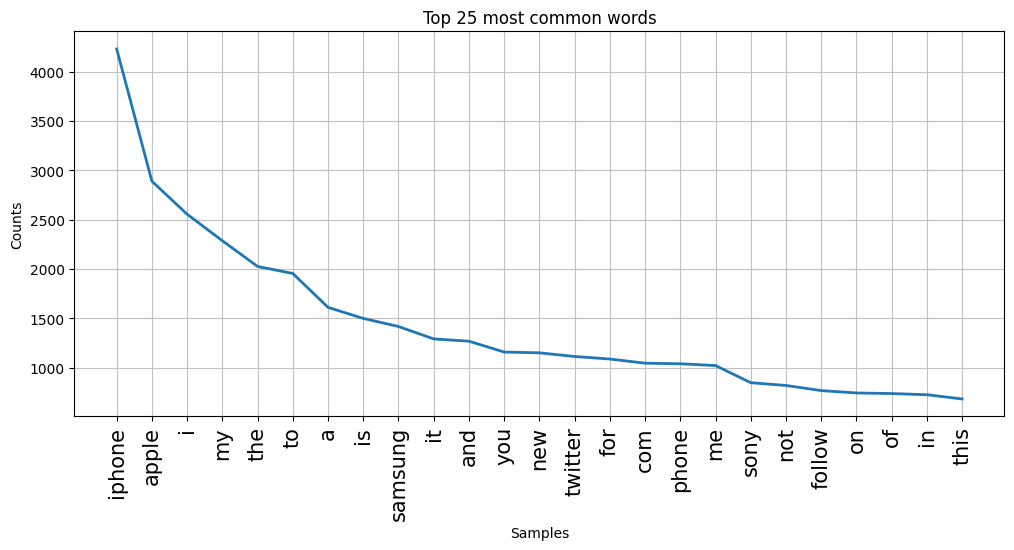

In [113]:
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist = nltk.FreqDist(all_words)
freq_dist.plot(25, cumulative=False)

plt.show()